In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

In [71]:
train_folder = "/home/rupok1/Desktop/train"
normal_folder = os.path.join(train_folder, "NORMAL")
pneumonia_folder = os.path.join(train_folder, "PNEUMONIA")

# Count images in each folder
n_normal_images = len(os.listdir(normal_folder))
n_pneumonia_images = len(os.listdir(pneumonia_folder))

# Print image counts
print(f"Number of normal images: {n_normal_images}")
print(f"Number of pneumonia images: {n_pneumonia_images}")

Number of normal images: 2898
Number of pneumonia images: 2990


In [72]:
test_folder = "/home/rupok1/Desktop/test"
normal_folder1 = os.path.join(test_folder, "NORMAL")
pneumonia_folder1 = os.path.join(test_folder, "PNEUMONIA")

# Count images in each folder
n_normal_images1 = len(os.listdir(normal_folder1))
n_pneumonia_images1 = len(os.listdir(pneumonia_folder1))

# Print image counts
print(f"Number of normal images: {n_normal_images1}")
print(f"Number of pneumonia images: {n_pneumonia_images1}")

Number of normal images: 250
Number of pneumonia images: 250


Data Augmentation Because of Imbalanced Dataset

In [12]:
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array

In [13]:
datagen = ImageDataGenerator(
       rotation_range = 40,
       width_shift_range = 0.2,
       height_shift_range = 0.2,
       shear_range = 0.2,
       zoom_range = 0.2,
       horizontal_flip = False,
       fill_mode = 'nearest'
)

In [14]:
img = load_img('/home/rupok1/Desktop/train/NORMAL/NORMAL2-IM-1126-0001.jpeg')

In [24]:
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

In [25]:
x.shape: (1, 1410, 1580, 3)

In [37]:
i = 0
for batch in datagen.flow(x, batch_size=4,
                          save_to_dir='/home/rupok1/Desktop/Preview/Train1/', save_prefix='ormal', save_format='jpeg'):
    i += 1
    if i > 92:
        break

In [27]:
img1 = load_img('/home/rupok1/Desktop/test/NORMAL/IM-0005-0001.jpeg')

In [28]:
x1 = img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1.shape: (1, 1410, 1580, 3)

In [29]:
j = 0
for batch in datagen.flow(x1, batch_size=4,
                          save_to_dir='/home/rupok1/Desktop/Preview/Test/', save_prefix='normal', save_format='jpeg'):
    j += 1
    if j > 100:
        break

In [38]:
train_folder = "/home/rupok1/Desktop/train"
normal_folder = os.path.join(train_folder, "NORMAL")
pneumonia_folder = os.path.join(train_folder, "PNEUMONIA")

# Count images in each folder
n_normal_images = len(os.listdir(normal_folder))
n_pneumonia_images = len(os.listdir(pneumonia_folder))

# Print image counts
print(f"Number of normal images: {n_normal_images}")
print(f"Number of pneumonia images: {n_pneumonia_images}")

Number of normal images: 2898
Number of pneumonia images: 2990


In [34]:
test_folder = "/home/rupok1/Desktop/test"
normal_folder1 = os.path.join(test_folder, "NORMAL")
pneumonia_folder1 = os.path.join(test_folder, "PNEUMONIA")

# Count images in each folder
n_normal_images1 = len(os.listdir(normal_folder1))
n_pneumonia_images1 = len(os.listdir(pneumonia_folder1))

# Print image counts
print(f"Number of normal images: {n_normal_images1}")
print(f"Number of pneumonia images: {n_pneumonia_images1}")

Number of normal images: 250
Number of pneumonia images: 250


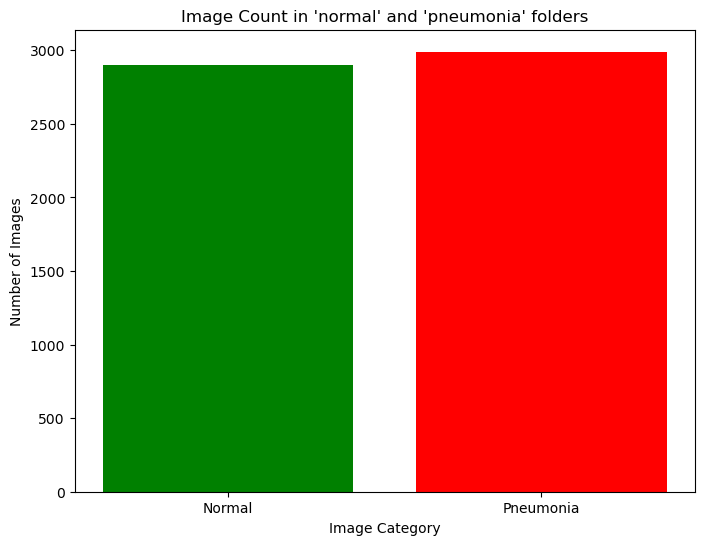

In [39]:
labels = ["Normal", "Pneumonia"]
data = [n_normal_images, n_pneumonia_images]

plt.figure(figsize=(8, 6))
plt.bar(labels, data, color=["green", "red"])
plt.xlabel("Image Category")
plt.ylabel("Number of Images")
plt.title("Image Count in 'normal' and 'pneumonia' folders")
plt.show()

In [55]:
data_train_path = "/home/rupok1/Desktop/train"

In [56]:
data_test_path = "/home/rupok1/Desktop/test"

In [57]:
img_width = 180
img_height = 180

In [58]:
data_train = tf.keras.utils.image_dataset_from_directory(
       data_train_path ,
       shuffle = True ,
       image_size = (img_width , img_height),
       batch_size = 32 ,
       validation_split = False      
)

Found 5888 files belonging to 2 classes.


In [59]:
data_cat = data_train.class_names

In [60]:
data_test = tf.keras.utils.image_dataset_from_directory(
       data_test_path ,
       shuffle = False ,
       image_size = (img_width , img_height),
       batch_size = 32 ,
       validation_split = False      
)

Found 500 files belonging to 2 classes.


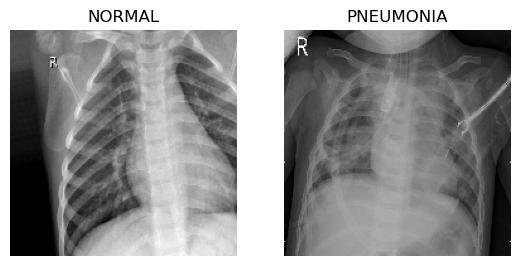

In [61]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(2):
    for i in range(2):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [62]:
from tensorflow.keras.models import Sequential

In [63]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))                
])

In [64]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [65]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_test, epochs=epochs_size)

Epoch 1/25
184/184 [==============================] - 80s 422ms/step - loss: 0.3864 - accuracy: 0.8903 - val_loss: 0.4845 - val_accuracy: 0.8140
Epoch 2/25
184/184 [==============================] - 78s 421ms/step - loss: 0.0958 - accuracy: 0.9660 - val_loss: 0.4659 - val_accuracy: 0.8780
Epoch 3/25
184/184 [==============================] - 78s 420ms/step - loss: 0.0806 - accuracy: 0.9723 - val_loss: 1.1206 - val_accuracy: 0.7360
Epoch 4/25
184/184 [==============================] - 78s 423ms/step - loss: 0.0659 - accuracy: 0.9754 - val_loss: 1.2254 - val_accuracy: 0.8120
Epoch 5/25
184/184 [==============================] - 86s 461ms/step - loss: 0.0498 - accuracy: 0.9832 - val_loss: 1.0171 - val_accuracy: 0.8300
Epoch 6/25
184/184 [==============================] - 85s 456ms/step - loss: 0.0344 - accuracy: 0.9885 - val_loss: 1.4480 - val_accuracy: 0.7660
Epoch 7/25
184/184 [==============================] - 84s 454ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 1.7014 - val_ac

In [66]:
model.evaluate(data_test)

16/16 [==============================] - 6s 204ms/step - loss: 2.8861 - accuracy: 0.7940


[2.8860855102539062, 0.7940000295639038]

Text(0.5, 1.0, 'Loss')

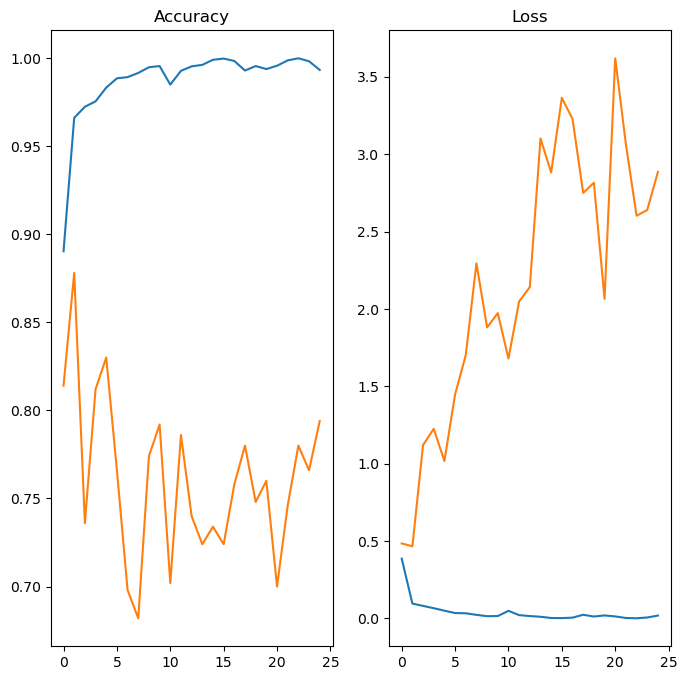

In [67]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')